In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

In [4]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/syntheticlog.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='b':
        print("activity: "+act_res[0][0]+" resource: "+str(act_res[0][1]))
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/1999 [00:00<?, ?it/s]

activity: b resource: 2
number of distinct batches: 18
Simultaneous 18
2020-01-28 21:30:00 to  2020-01-28 21:30:00
2020-01-31 20:30:00 to  2020-01-31 20:30:00
2020-02-11 22:30:00 to  2020-02-11 22:30:00
2020-02-21 23:30:00 to  2020-02-21 23:30:00
2020-02-24 22:30:00 to  2020-02-24 22:30:00
2020-02-25 16:30:00 to  2020-02-25 16:30:00
2020-03-02 02:30:00 to  2020-03-02 02:30:00
2020-03-06 16:30:00 to  2020-03-06 16:30:00
2020-03-16 16:30:00 to  2020-03-16 16:30:00
2020-03-26 16:30:00 to  2020-03-26 16:30:00
2020-04-05 16:30:00 to  2020-04-05 16:30:00
2020-04-10 20:30:00 to  2020-04-10 20:30:00
2020-04-15 16:30:00 to  2020-04-15 16:30:00
2020-04-17 19:30:00 to  2020-04-17 19:30:00
2020-04-25 16:30:00 to  2020-04-25 16:30:00
2020-05-05 16:30:00 to  2020-05-05 16:30:00
2020-05-15 16:30:00 to  2020-05-15 16:30:00
2020-05-25 16:30:00 to  2020-05-25 16:30:00
activity: b resource: 9
number of distinct batches: 15
Simultaneous 15
2020-02-02 00:30:00 to  2020-02-02 00:30:00
2020-02-06 01:30:00 to

In [7]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\syntheticlogtarget.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [8]:
targetdatedataframe


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList
0,2020-01-22,5,0,5,0 days 17:30:00,5,[]
1,2020-01-23,21,0,26,10 days 06:00:00,26,[]
2,2020-01-24,10,4,32,39 days 08:00:00,36,"['1837', '1012', '502', '62']"
3,2020-01-25,28,2,58,80 days 00:00:00,60,"['1059', '859']"
4,2020-01-26,20,3,75,140 days 23:30:00,78,"['653', '163', '108']"
...,...,...,...,...,...,...,...
245,2020-09-23,0,0,3,18 days 16:30:00,3,[]
246,2020-09-24,0,1,2,21 days 10:00:00,3,['562']
247,2020-09-25,0,1,1,16 days 05:30:00,2,['1904']
248,2020-09-26,0,0,1,9 days 05:30:00,1,[]


[5, 20, 25, 35, 40, 45, 55, 60, 65, 70, 75, 80, 95, 100, 105, 110, 125, 130, 135, 140, 155, 160, 165, 170, 180, 190, 195, 215, 220, 230, 250]


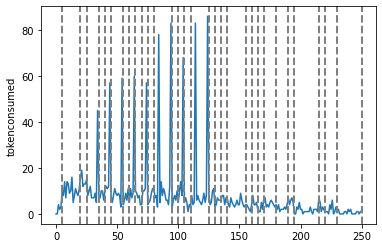

In [9]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

[5, 25, 50, 60, 65, 90, 95, 100, 120, 125, 145, 165, 170, 195, 200, 205, 210, 215, 220, 240, 250]


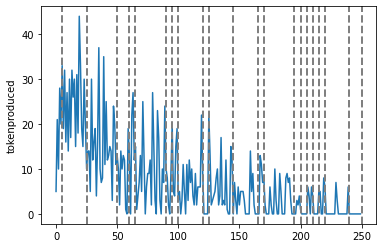

In [10]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='chunkmean'>

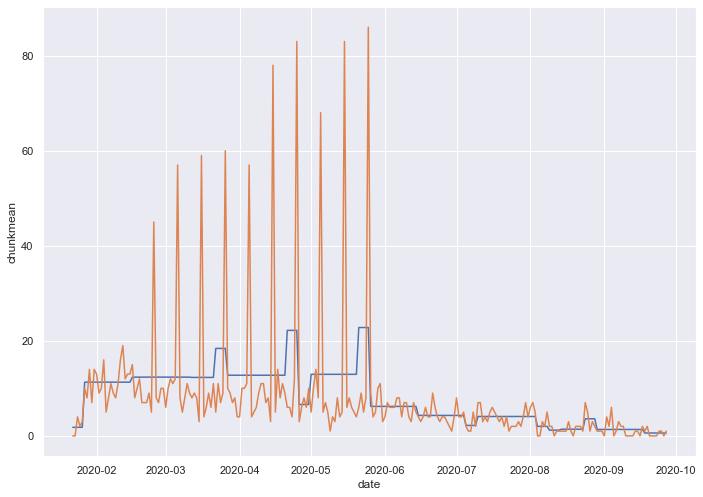

In [12]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
sns.set(rc={'figure.figsize':(11.7,8.27)})
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')


In [36]:
def categorise(row):   
    if row['chunkmean']*1.5 < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

32


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
2,2020-01-24,10,4,32,39 days 08:00:00,36,"['1837', '1012', '502', '62']",1.80,1,1,16.80,1,0
4,2020-01-26,20,3,75,140 days 23:30:00,78,"['653', '163', '108']",1.80,1,1,16.80,1,1
21,2020-02-12,19,19,323,2740 days 22:30:00,342,"['1738', '1699', '1627', '1534', '1472', '1446...",11.30,2,1,25.05,2,0
34,2020-02-25,16,45,365,6669 days 23:30:00,410,"['1983', '1926', '1844', '1755', '1743', '1685...",12.36,3,1,15.40,3,1
44,2020-03-06,15,57,395,9734 days 01:30:00,452,"['1934', '1922', '1920', '1886', '1881', '1869...",12.36,3,1,15.40,3,0
54,2020-03-16,10,59,388,12528 days 08:00:00,447,"['1966', '1951', '1874', '1852', '1824', '1789...",12.30,4,1,9.40,4,1
64,2020-03-26,12,60,379,14597 days 01:30:00,439,"['1997', '1968', '1952', '1907', '1882', '1825...",18.40,5,1,14.80,5,0
74,2020-04-05,6,57,337,16195 days 10:30:00,394,"['1995', '1866', '1860', '1832', '1827', '1813...",12.76,6,1,9.96,6,0
84,2020-04-15,17,78,312,17089 days 23:00:00,390,"['1955', '1949', '1947', '1944', '1918', '1906...",12.76,6,1,9.96,6,1
94,2020-04-25,9,83,227,15978 days 04:30:00,310,"['1980', '1956', '1883', '1870', '1858', '1835...",22.20,7,1,5.80,7,1


C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='pchunkmean'>

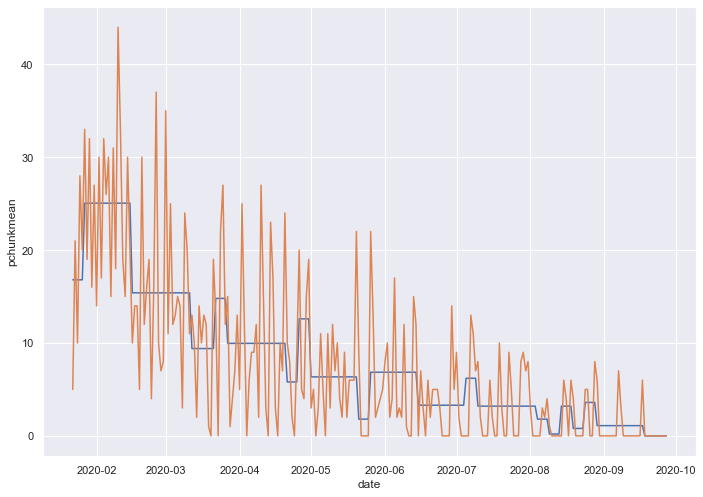

In [14]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')


In [15]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

99


,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
1,2020-01-23,21,0,26,10 days 06:00:00,26,[],1.80,1,0,16.80,1,1
3,2020-01-25,28,2,58,80 days 00:00:00,60,"['1059', '859']",1.80,1,1,16.80,1,1
4,2020-01-26,20,3,75,140 days 23:30:00,78,"['653', '163', '108']",1.80,1,1,16.80,1,1
5,2020-01-27,33,10,98,216 days 23:00:00,108,"['1848', '1708', '1675', '1411', '898', '616',...",11.30,2,0,25.05,2,1
7,2020-01-29,32,14,127,405 days 07:30:00,141,"['1935', '1819', '1572', '1554', '1462', '1147...",11.30,2,1,25.05,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-08-28,8,2,11,27 days 13:30:00,13,"['1601', '791']",3.60,19,0,3.60,19,1
220,2020-08-29,6,1,16,29 days 09:00:00,17,['203'],1.35,20,0,1.10,20,1
229,2020-09-07,7,3,5,10 days 21:30:00,8,"['1604', '223', '79']",1.35,20,1,1.10,20,1
230,2020-09-08,3,2,6,7 days 12:00:00,8,"['1422', '305']",1.35,20,1,1.10,20,1


In [27]:
print(len(batchespm4py))
df = pd.DataFrame(batchespm4py, columns = ['batchingdate'])
pd.set_option('display.max_rows',310)
df['date']=df['batchingdate'].dt.date
df.sort_values(by='batchingdate')
df['date'].nunique()



44


40

In [28]:
pd.set_option('display.max_rows',310)
merged=pd.merge(df,batcheddf,on='date',how='right')
merged.sort_values(by=['date'])

,batchingdate,date,tokenproduced,tokenconsumed,tokenleft,WaitingTime,Count,consumedByUserList,chunkmean,chunkindex,chunkbatched,pchunkmean,pchunkindex,pchunkbatched
0,NaT,2020-01-24,10,4,32,39 days 08:00:00,36,"['1837', '1012', '502', '62']",1.80,1,1,16.80,1,0
1,NaT,2020-01-25,28,2,58,80 days 00:00:00,60,"['1059', '859']",1.80,1,1,16.80,1,1
2,NaT,2020-01-26,20,3,75,140 days 23:30:00,78,"['653', '163', '108']",1.80,1,1,16.80,1,1
3,NaT,2020-01-29,32,14,127,405 days 07:30:00,141,"['1935', '1819', '1572', '1554', '1462', '1147...",11.30,2,1,25.05,2,1
4,2020-01-31 20:30:00,2020-01-31,27,14,149,604 days 22:30:00,163,"['1773', '1719', '1541', '1527', '1401', '1190...",11.30,2,1,25.05,2,1
5,2020-01-31 17:30:00,2020-01-31,27,14,149,604 days 22:30:00,163,"['1773', '1719', '1541', '1527', '1401', '1190...",11.30,2,1,25.05,2,1
6,NaT,2020-02-01,14,13,150,723 days 00:00:00,163,"['1863', '1793', '1696', '1574', '1497', '1383...",11.30,2,1,25.05,2,0
7,NaT,2020-02-04,32,16,194,1068 days 19:00:00,210,"['1859', '1809', '1727', '1595', '1580', '1315...",11.30,2,1,25.05,2,1
8,2020-02-11 22:30:00,2020-02-11,33,16,323,2470 days 10:30:00,339,"['1890', '1799', '1158', '1132', '649', '575',...",11.30,2,1,25.05,2,1
9,NaT,2020-02-12,19,19,323,2740 days 22:30:00,342,"['1738', '1699', '1627', '1534', '1472', '1446...",11.30,2,1,25.05,2,0


In [29]:
merged['date'].nunique()

69

In [ ]:
Shared - 19
Pm4py- 40
Statistical- 32
Original- 10


In [21]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date